In [1]:
#-*- encoding: utf-8 -*-
import pandas as pd
from datetime import datetime
import platform
from matplotlib import font_manager, rc
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
import folium
from datetime import datetime, timedelta
from pandas import DataFrame
from time import localtime,strftime
import seaborn as sns
import matplotlib.ticker as ticker
colors = sns.color_palette('hls',11)
mpl.rcParams['axes.unicode_minus'] = False

In [2]:
data_set= pd.read_csv('department_data_ho(utf-8).csv',encoding='utf-8')

In [3]:
%matplotlib inline 
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows':
    path ='C:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Can't find your system.")

In [12]:
data_set['count']=1

In [15]:
data_set

,Unnamed: 0,custid,date_time,store,product,brand,corner,pc,part,imported,...,discount,installment,gender,지점,지점명,평균기온(°C),일강수량(mm),time,week,count
0,0,0,2000-06-25 12:12:00,무역점,2116050008000,에스티로더,수입종합화장품,화장품,명품잡화,1,...,9000,3,1,108,서울,25.1,0.0,12:12,Sunday,1
1,1,0,2000-06-25 12:42:00,무역점,4125440008000,시슬리,수입종합화장품,화장품,명품잡화,1,...,3900,1,1,108,서울,25.1,0.0,12:42,Sunday,1
2,2,0,2000-08-26 18:10:00,본점,2116052008000,크리니크,수입종합화장품,화장품,잡화파트,1,...,17500,3,1,108,서울,22.1,89.3,18:10,Saturday,1
3,3,0,2000-08-26 18:30:00,본점,4106430119900,듀퐁,수입의류,명품토탈,잡화파트,1,...,45500,3,1,108,서울,22.1,89.3,18:30,Saturday,1
4,4,0,2000-09-03 18:02:00,무역점,2139141008000,랑콤,수입종합화장품,화장품,명품잡화,0,...,10000,3,1,108,서울,25.1,9.5,18:02,Sunday,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1726425,1726425,49993,2001-01-31 17:50:00,신촌점,4405551020474,톰키드,아동,아동,아동문화,0,...,0,1,1,108,서울,-0.3,4.0,17:50,Wednesday,1
1726426,1726426,49993,2001-01-31 18:33:00,신촌점,2139140008300,폴로화장품,향수,화장품,패션잡화,0,...,3500,1,1,108,서울,-0.3,4.0,18:33,Wednesday,1
1726427,1726427,49994,2001-04-14 17:50:00,본점,4230120011274,스테파넬,영트랜드,영트렌디,"케주얼,구두,아동",0,...,0,1,0,108,서울,9.1,4.3,17:50,Saturday,1
1726428,1726428,49994,2001-04-14 18:10:00,본점,4409271026010,써스데이아일앤드,진케주얼,진케주얼,"케주얼,구두,아동",0,...,0,1,0,108,서울,9.1,4.3,18:10,Saturday,1


In [19]:
#date_all=data_set.groupby(['all_date']).mean()
dat=data_set[data_set['gender']==0]
#index_n1 = dat[dat['pc']=='화장품'].index
dat= dat.drop(index_n1)
eeee=dat.groupby('brand').sum()
eeee=eeee.sort_values(by=['amount'],ascending=False)[:20]
eeee

,Unnamed: 0,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),count
brand,,,,,,,,,,,,
식품,202393819763,5838983442,634248900000000000,0,9137942104,192980,269110,0,25369956,2962957.1,769781.9,234907
폴로,8601229790,248159835,54828808022911248,126,1119303000,55712930,23959,0,1063476,130770.9,37833.5,9847
타임,3292134317,94997277,15699159737300252,0,909024000,51135150,10678,0,402840,50687.6,13174.6,3730
지오다노,16265017086,469288586,83731451017627296,0,795665600,40802490,28022,0,2027268,247840.2,61166.8,18771
버버리,2029215487,58550638,9550838062735470,2329,744200600,35323860,7073,0,251532,26074.7,7236.2,2329
마인,3268289986,94304773,15967804878008932,0,733084600,35004490,10487,0,410292,46447.5,12161.1,3799
삼성,1444839698,41688030,7293500740398749,0,676484330,151730,4963,0,174960,22568.6,5503.8,1620
빈폴,4736832114,136671528,34174984730187060,0,582621500,25731720,13020,0,585144,75505.9,14214.6,5418
에뜨로,1501842279,43324740,7414128345021383,1635,508710700,22765150,4770,0,194400,22417.9,5194.9,1800


In [75]:
data_set['date_time'] = pd.to_datetime(data_set['date_time'],format = '%Y-%m-%d %H:%M:%S',errors='raise')
data_set['date_time']= data_set['date_time'].astype('str')
data_set['date_time']=pd.to_datetime(data_set['date_time'])
data_set['month'] = data_set['date_time'].dt.strftime('%m')
data_set=data_set.drop(['Unnamed: 0'],axis=1)
data_set['time']= data_set['time'].astype('str')
data_set['time']=pd.to_datetime(data_set['time'])
data_set['hour']=data_set['time'].dt.strftime('%H')
data_set['all_date']=data_set["date_time"].dt.strftime('%Y-%m-%d')
data_set['all_date']=data_set['all_date'].astype('str')
data_set['week'] = data_set['date_time'].dt.strftime('%A')
data_set

KeyError: "['Unnamed: 0'] not found in axis"

## 날짜별 판매액 

<ipython-input-5-0bd4214e1f20>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax =plt.axes()


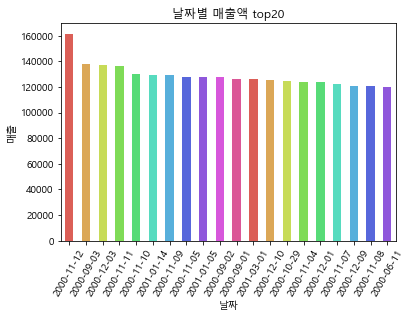

In [5]:
date_all=data_set.groupby(['all_date']).mean()
date_all=date_all.sort_values(by=['amount'],ascending=False)[:20]
date_all1=date_all['amount']
date_all1.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(20,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(5))
plt.title("날짜별 매출액 top20")
plt.xlabel("날짜")
plt.xticks(rotation=60)
plt.ylabel("매출")
plt.show()

In [6]:
brand_s=data_set.groupby(['brand']).mean()
brand_s=pd.DataFrame(brand_s)
tt=brand_s.sort_values(by=['amount'],ascending=True)[:20].index

In [7]:
def collect2(df):
    if df =="03" or df == "04"or df == "05":
        return '봄'
    elif df =="06" or df == "07" or  df =="08":
        return '여름'
    elif df =="09" or df == "10" or df == "11":
        return '가을'
    elif df =="12" or df == "01" or df == "02":
        return '겨울'
data_set['season']=data_set['month'].apply(collect2)

In [8]:
def collect(df):
    if df =="10" or df == "11":
        return '오전'
    elif df =="12" or df == "13" or  df =="14":
        return '오후1'
    elif df =="15" or df == "16" or df == "17":
        return '오후2'
    elif df =="18" or df == "19" or df == "20":
        return '오후3'
    else :
        return '그외'
data_set['ro']=data_set['hour'].apply(collect)

In [9]:
roro_s=data_set.groupby(['ro','store']).sum()['amount']
hour_s=data_set.groupby(['store','hour']).sum()['amount']

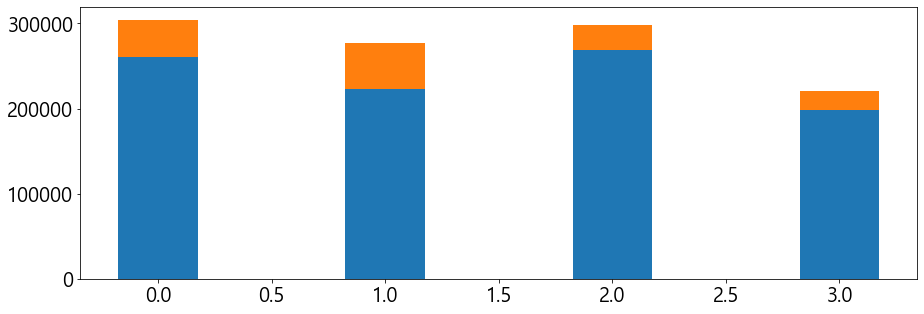

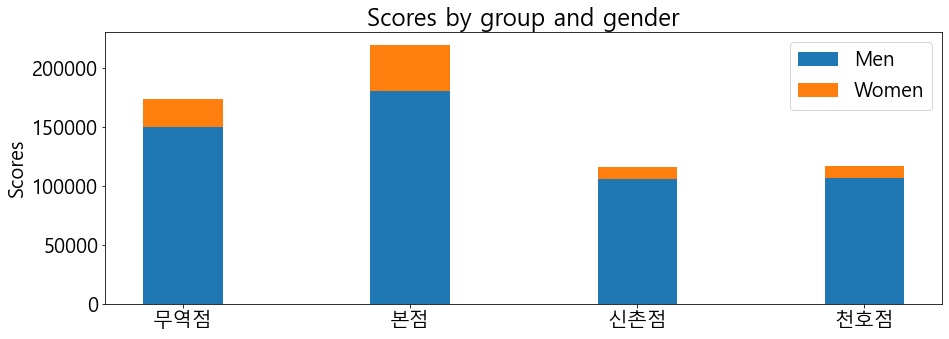

In [74]:
ss1=data_set.groupby(['store','gender','imported']).count()
ss_1=data_set.groupby(['store','gender','imported']).sum()
a=[] #0 0
b=[] #0 1
c=[] #1 0
d=[] #1 1
for i in range(len(ss1['custid'])):
    if i % 4 ==0 : 
        a.append(ss1['custid'][i])
    elif i % 4 ==1 : 
        b.append(ss1['custid'][i])
    elif i % 4 ==2 : 
        c.append(ss1['custid'][i])
    else:
        d.append(ss1['custid'][i])
import numpy as np
#data1=[a,b]
#data2=[c,d]
fig , ax = plt.subplots()
ind = np.arange(4)    # the x locations for the groups
width = 0.35
p1 = ax.bar(ind, a, width)
p2 = ax.bar(ind, b, width, bottom=a)
fig , ax2 = plt.subplots()
p3 = ax2.bar(ind, c, width)
p4 = ax2.bar(ind, d, width, bottom=c)
plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ["무역점","본점","신촌점","천호점"])
#plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

store  gender  imported
무역점    0       0           260218
               1            43784
       1       0           150415
               1            23797
본점     0       0           223183
               1            53629
       1       0           180325
               1            39384
신촌점    0       0           269129
               1            28924
       1       0           105745
               1            10050
천호점    0       0           198367
               1            22210
       1       0           106668
               1            10602
Name: custid, dtype: int64
16
[260218, 223183, 269129, 198367]


TypeError: 'value' must be an instance of str or bytes, not a tuple

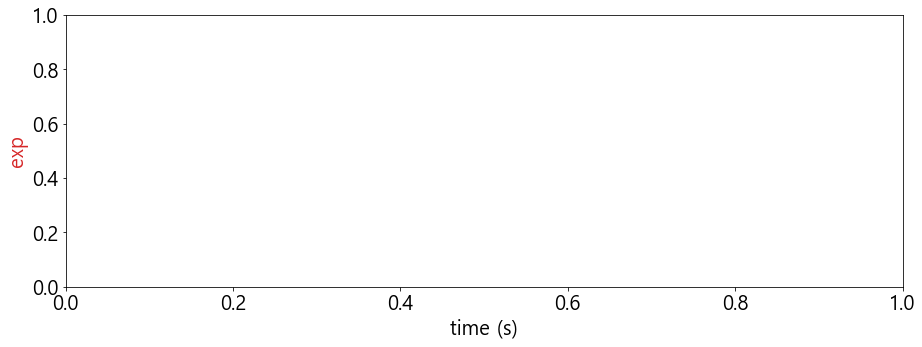

In [70]:
# store1= data_set[data_set["store"]=="본점"]
# store2= data_set[data_set["store"]=="무역점"]
# store3= data_set[data_set["store"]=="천호점"]
# store4= data_set[data_set["store"]=="신촌점"]
#ss1=data_set.groupby(['store','gender','imported']).count()
ss1=data_set.groupby(['store','gender','imported']).count()
# ss2=store2.groupby(['store','gender','imported']).count()
# ss3=store3.groupby(['store','gender','imported']).count()
# ss4=store4.groupby(['store','gender','imported']).count()
ss_1=data_set.groupby(['store','gender','imported']).sum()
# ss_2=store2.groupby(['store','gender','imported']).sum()
# ss_3=store3.groupby(['store','gender','imported']).sum()
# ss_4=store4.groupby(['store','gender','imported']).sum()
print(ss1['custid'])
print(len(ss1['custid']))
a=[] #0 0
b=[] #0 1
c=[] #1 0
d=[] #1 1
for i in range(len(ss1['custid'])):
    if i % 4 ==0 : 
        a.append(ss1['custid'][i])
    elif i % 4 ==1 : 
        b.append(ss1['custid'][i])
    elif i % 4 ==2 : 
        c.append(ss1['custid'][i])
    else:
        d.append(ss1['custid'][i])
print(a)
import numpy as np
#ss1['store']
data1=[a,b]
data2=[c,d]

fig , ax1 = plt.subplots()
width=0.35
x=np.arange(len(labels))
labels = ["무역점","본점","신촌점","천호점"]
for i in range(0,2):
    ax1.bar(
    labels,data1[i],
    bottom=np.sum(data1[:i],axis=0))
#     ax.bar(
#     labels,data1[i],
#     bottom=np.sum(data2[:i],axis=0))
fig , ax2= plt.subplots()
for i in range(0,2):
    ax2.bar(
    labels,data2[i],
    bottom=np.sum(data2[:i],axis=0))    
ax.set_ylabel('이것')
ax.set_title('요것이 제목')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()
fig.tight_layout()
plt.show()
# 
# # print(b)
# width=0.35
# plt.figure(figsize=(9,7))
# x=np.arange(len(labels))
# fig , ax = plt.subplots()
# rect1 =ax.bar(x-width/2,a,width,label='여자')
# ax.bar(x-width/2,bottom=b,0.35,label='수입')
# rect2 =ax.bar(x+width/2,c,width,label='남자')
# ax.bar(x-width/2,bottom=d,0.35,label='수입')
# ax.set_ylabel('이것')
# ax.set_title('요것이 제목')
# ax.set_xticks(x)
# ax.set_xticklabels(labels)
# ax.legend()
# fig.tight_layout()
# plt.show()
# data1=ss1['custid']#횟수
# data2=ss_1['amount']#금액
# fig, ax1 = plt.subplots()
# color = 'tab:red'
# ax1.set_xlabel('time (s)')
# ax1.set_ylabel('exp', color=color)
# ax1.plot(ss1.index, data1, color=color)
# ax1.tick_params(axis='y', labelcolor=color)
# ax1.annotate('', xy=(7, 1096), xytext=(-0.5, 1096), # start the arrow from x=7 and draw towards primary y-axis
#             arrowprops=dict(arrowstyle="<-", color=color))
# ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis
# color = 'tab:blue'
# ax2.set_ylabel('sin', color=color)  # we already handled the x-label with ax1
# ax2.plot(t, data2, color=color)
# ax2.tick_params(axis='y', labelcolor=color)
# # plt.arrow()
# ax2.annotate('', xy=(6,0),  xytext=(10.4, 0), # start the arrow from x=6 and draw towards secondary y-axis
#             arrowprops=dict(arrowstyle="<-", color=color))
# fig.tight_layout()  # otherwise the right y-label is slightly clipped
# plt.show()
# # ss2=store2.groupby('hour').sum()
# # ss3=store3.groupby('hour').sum()
# # ss4=store4.groupby('hour').sum()
# # sss1=ss1['amount']
# # sss2=ss2['amount']
# # sss3=ss3['amount']
# # sss4=ss4['amount']

## 계절별 판매 금액

In [10]:
sseason_all=data_set.groupby('season').sum()
sseason_all

,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm)
season,,,,,,,,,,
가을,10428654452,1641134009741693184,57121,45135226756,1669790740,811484,151450,45255456,6.249358e+06,941042.1
겨울,9948949878,1543330944292637952,55196,41031100976,1289104420,742586,141652,43124616,-4.886376e+05,505906.9
봄,11410189543,1799528336087031808,60641,44118790429,1612475190,855275,165780,49477068,5.503248e+06,549744.4
여름,11208339683,1777387937666455040,59422,40060601364,1218421470,819724,168104,48597300,1.144922e+07,3634389.7


## 계절별 평균 판매금액

<ipython-input-11-cb3ad62e7e79>:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax =plt.axes()


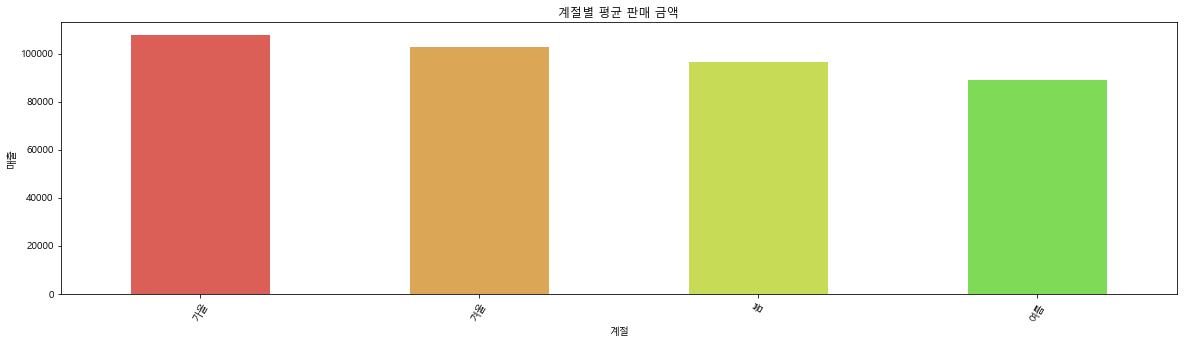

In [11]:
sseason_all_mean=data_set.groupby('season').mean()
sseason_all_mean=sseason_all_mean['amount']
sseason_all_mean.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("계절별 평균 판매 금액")
plt.xlabel("계절")
plt.xticks(rotation=60)
plt.ylabel("매출")
plt.show()

## 계절별 판매 횟수

In [19]:
data_set['count']=1
sseason_all_to=data_set.groupby('season').sum()
sseason_all_to=sseason_all_to.sort_values(by=['count'],ascending=False)

<ipython-input-20-fdbb8c48464f>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax =plt.axes()


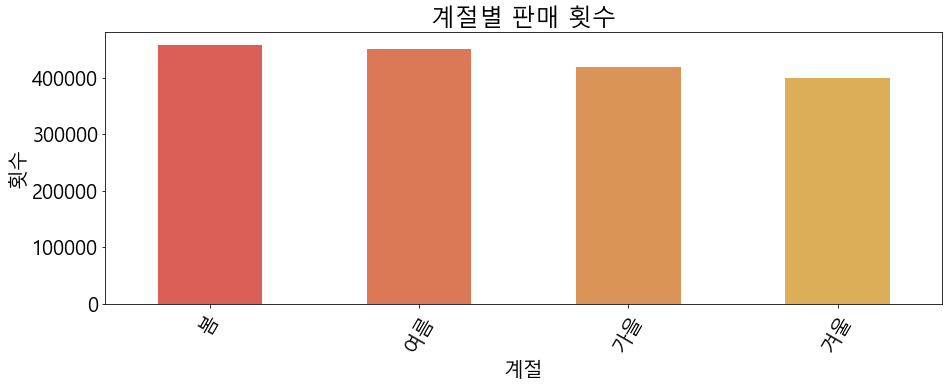

In [20]:
sseason_all_to=sseason_all_to['count']
sseason_all_to.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("계절별 판매 횟수")
plt.xlabel("계절")
plt.xticks(rotation=60)
plt.ylabel("횟수")
plt.show()

In [14]:
sseason_all=data_set.groupby('season').sum()
sseason_all

,custid,product,imported,amount,discount,installment,gender,지점,평균기온(°C),일강수량(mm),count
season,,,,,,,,,,,
가을,10428654452,1641134009741693184,57121,45135226756,1669790740,811484,151450,45255456,6.249358e+06,941042.1,419032
겨울,9948949878,1543330944292637952,55196,41031100976,1289104420,742586,141652,43124616,-4.886376e+05,505906.9,399302
봄,11410189543,1799528336087031808,60641,44118790429,1612475190,855275,165780,49477068,5.503248e+06,549744.4,458121
여름,11208339683,1777387937666455040,59422,40060601364,1218421470,819724,168104,48597300,1.144922e+07,3634389.7,449975


<ipython-input-15-1e740f219ff1>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax =plt.axes()


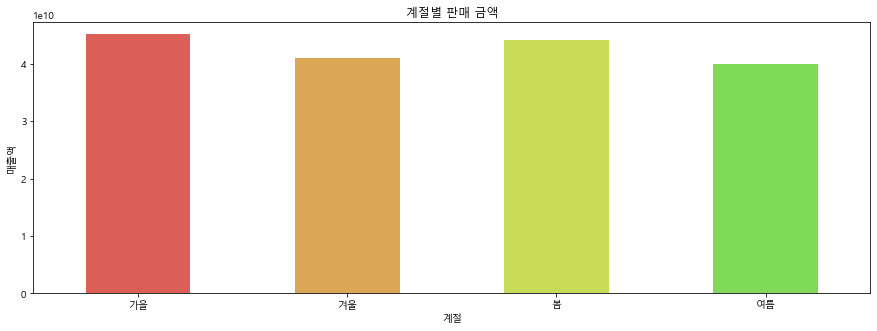

In [15]:
sseason_all=sseason_all['amount']
sseason_all_to=sseason_all_to.sort_values(by=['amount'],ascending=False)
sseason_all.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("계절별 판매 금액")
plt.xlabel("계절")
plt.ylabel("매출액")
plt.show()

In [16]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(sseason_all['amount'],
                                    labels=sseason_all.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '계절별 매출액 비중'
plt.title(title, size=40)
plt.show()

KeyError: 'amount'

<Figure size 1440x1440 with 0 Axes>

## 계절별 pc 판매률

In [ ]:
sseason1=season1.groupby('pc').sum()
sseason2=season2.groupby('pc').sum()
sseason3=season3.groupby('pc').sum()
sseason4=season4.groupby('pc').sum()
ssea1=sseason1.sort_values(by=['amount'],ascending=False)[:10]
ssea2=sseason2.sort_values(by=['amount'],ascending=False)[:10]
ssea3=sseason3.sort_values(by=['amount'],ascending=False)[:10]
ssea4=sseason4.sort_values(by=['amount'],ascending=False)[:10]

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea1['amount'],
                                    labels=ssea1.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '봄 top10 pc'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea2['amount'],
                                    labels=ssea2.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '여름 top10 pc'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea3['amount'],
                                    labels=ssea3.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '가을 top10 pc'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea4['amount'],
                                    labels=ssea4.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '겨울 top10 pc'
plt.title(title, size=40)
plt.show()

In [ ]:
index_n1 = data_set[data_set['brand']=='식품'].index
data_set2= data_set.drop(index_n1)
season1= data_set2[data_set2['season']=="봄"]
season2= data_set2[data_set2["season"]=="여름"]
season3= data_set2[data_set2["season"]=="가을"]
season4= data_set2[data_set2["season"]=="겨울"]

In [ ]:
sseason1=season1.groupby('brand').sum()
sseason2=season2.groupby('brand').sum()
sseason3=season3.groupby('brand').sum()
sseason4=season4.groupby('brand').sum()
ssea1=sseason1.sort_values(by=['amount'],ascending=False)[:10]
ssea2=sseason2.sort_values(by=['amount'],ascending=False)[:10]
ssea3=sseason3.sort_values(by=['amount'],ascending=False)[:10]
ssea4=sseason4.sort_values(by=['amount'],ascending=False)[:10]
ssea1

In [ ]:
sseason1=season1.groupby('brand').mean()
sseason2=season2.groupby('brand').sum()
sseason3=season3.groupby('brand').sum()
sseason4=season4.groupby('brand').sum()
ssea1=sseason1.sort_values(by=['amount'],ascending=False)[:10]
ssea2=sseason2.sort_values(by=['amount'],ascending=False)[:10]
ssea3=sseason3.sort_values(by=['amount'],ascending=False)[:10]
ssea4=sseason4.sort_values(by=['amount'],ascending=False)[:10]
ssea1

## 계절별 top10 브랜드

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea1['amount'],
                                    labels=ssea1.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '봄 top10 브랜드'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea2['amount'],
                                    labels=ssea2.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '여름 top10 브랜드'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea3['amount'],
                                    labels=ssea3.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '가을 top10 브랜드'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ssea4['amount'],
                                    labels=ssea4.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '겨울 top10 브랜드'
plt.title(title, size=40)
plt.show()

## 지점당 시간별 매출

In [ ]:
index_n1 = data_set[data_set['hour']=='00'].index
data_set1= data_set.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='01'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='08'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='09'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='21'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='22'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='23'].index
data_set1= data_set1.drop(index_n1)
store1= data_set1[data_set1["store"]=="본점"]
store2= data_set1[data_set1["store"]=="무역점"]
store3= data_set1[data_set1["store"]=="천호점"]
store4= data_set1[data_set1["store"]=="신촌점"]
ss1=store1.groupby('hour').sum()
ss2=store2.groupby('hour').sum()
ss3=store3.groupby('hour').sum()
ss4=store4.groupby('hour').sum()
sss1=ss1['amount']
sss2=ss2['amount']
sss3=ss3['amount']
sss4=ss4['amount']
sss1.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(본점)")
plt.xlabel("시간")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()
sss2.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(무역점)")
plt.xlabel("시간")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()
sss3.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(천호점)")
plt.xlabel("시간")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()
sss4.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(신촌점)")
plt.xlabel("시간")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()

## 시간별 브랜드 판매률

In [ ]:
index_n1 = data_set[data_set['hour']=='00'].index
data_set1= data_set.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='01'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='08'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='09'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='21'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='22'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['hour']=='23'].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['amount']<0].index
data_set1= data_set1.drop(index_n1)
index_n1 = data_set1[data_set1['brand']=='식품'].index
data_set1= data_set1.drop(index_n1)
store1= data_set1[data_set1["hour"]=="10"]
store2= data_set1[data_set1["hour"]=="11"]
store3= data_set1[data_set1["hour"]=="12"]
store4= data_set1[data_set1["hour"]=="13"]
store5= data_set1[data_set1["hour"]=="14"]
store6= data_set1[data_set1["hour"]=="15"]
store7= data_set1[data_set1["hour"]=="16"]
store8= data_set1[data_set1["hour"]=="17"]
store9= data_set1[data_set1["hour"]=="18"]
store10= data_set1[data_set1["hour"]=="19"]
store11= data_set1[data_set1["hour"]=="20"]
ss1=store1.groupby('brand').sum()
ss1=ss1.sort_values(by='amount',ascending=False)[:20]
ss2=store2.groupby('brand').sum()
ss2=ss2.sort_values(by='amount',ascending=False)[:20]
ss3=store3.groupby('brand').sum()
ss3=ss3.sort_values(by='amount',ascending=False)[:20]
ss4=store4.groupby('brand').sum()
ss4=ss4.sort_values(by='amount',ascending=False)[:20]
ss5=store5.groupby('brand').sum()
ss5=ss5.sort_values(by='amount',ascending=False)[:20]
ss6=store6.groupby('brand').sum()
ss6=ss6.sort_values(by='amount',ascending=False)[:20]
ss7=store7.groupby('brand').sum()
ss7=ss7.sort_values(by='amount',ascending=False)[:20]
ss8=store8.groupby('brand').sum()
ss8=ss8.sort_values(by='amount',ascending=False)[:20]
ss9=store9.groupby('brand').sum()
ss9=ss9.sort_values(by='amount',ascending=False)[:20]
ss10=store10.groupby('brand').sum()
ss10=ss10.sort_values(by='amount',ascending=False)[:20]
ss11=store11.groupby('brand').sum()
ss11=ss11.sort_values(by='amount',ascending=False)[:20]
# sss1=ss1['amount']
# sss2=ss2['amount']
# sss3=ss3['amount']
# sss4=ss4['amount']
# sss5=ss5['amount']
# sss6=ss6['amount']
# sss7=ss7['amount']
# sss8=ss8['amount']
# sss9=ss9['amount']
# sss10=ss10['amount']
# sss11=ss11['amount']
# sss1.plot(kind='bar', rot=0,color=colors)
# plt.title("시간별 매출 금액(본점)")
# plt.xlabel("시간")
# plt.xticks(rotation=45)
# plt.ylabel("매출")
# plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss1['amount'],
                                    labels=ss1.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '10시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss2['amount'],
                                    labels=ss2.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '11시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss3['amount'],
                                    labels=ss3.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '12시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss4['amount'],
                                    labels=ss4.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '13시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss5['amount'],
                                    labels=ss5.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '14시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss6['amount'],
                                    labels=ss6.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '15시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss7['amount'],
                                    labels=ss7.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '16시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss8['amount'],
                                    labels=ss8.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '17시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss9['amount'],
                                    labels=ss9.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '18시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss10['amount'],
                                    labels=ss10.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '19시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',20)
patches, texts, autotexts = plt.pie(ss11['amount'],
                                    labels=ss11.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '20시 브랜드별 판매률(식품제외)'
plt.title(title, size=40)
plt.show()

In [ ]:
index_n1 = data_set[data_set['hour']=='00' or data_set['hour']=='01' or data_set['hour']=='08' or data_set['hour']=='09' or data_set['hour']=='21' or data_set['hour']=='22' or data_set['hour']=='23'].index
data_set1= data_set.drop(index_n1)

In [ ]:
index_n1 =data_set[data_set['ro']=='그외'].index
data_set1=data_set.drop(index_n1)
store1= data_set1[data_set1["store"]=="본점"]
store2= data_set1[data_set1["store"]=="무역점"]
store3= data_set1[data_set1["store"]=="천호점"]
store4= data_set1[data_set1["store"]=="신촌점"]
ss1=store1.groupby('hour').sum()
ss2=store2.groupby('hour').sum()
ss3=store3.groupby('hour').sum()
ss4=store4.groupby('hour').sum()
sss1=ss1['amount']
sss2=ss2['amount']
sss3=ss3['amount']
sss4=ss4['amount']
sss1.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(본점)")
plt.xlabel("시간")
plt.ylabel("매출")
plt.show()
sss2.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(무역점)")
plt.xlabel("시간")
plt.ylabel("매출")
plt.show()
sss3.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(천호점)")
plt.xlabel("시간")
plt.ylabel("매출")
plt.show()
sss4.plot(kind='bar', rot=0,color=colors)
plt.title("시간별 매출 금액(신촌점)")
plt.xlabel("시간")
plt.ylabel("매출")
plt.show()

## 시간별 pc 판매률

In [ ]:
data_set1["part"] = data_set1["part"].replace("가정용품","가정용품파트")
data_set1["part"] = data_set1["part"].replace("골프/유니캐쥬얼","골프_스포츠")
data_set1["part"] = data_set1["part"].replace("공산품","공산품파트")
data_set1["part"] = data_set1["part"].replace("남성정장스포츠","남성의류")
data_set1["part"] = data_set1["part"].replace("로얄부띠끄","명품_부띠끄")
data_set1["part"] = data_set1["part"].replace("로얄부틱","명품_부띠끄")
data_set1["part"] = data_set1["part"].replace("명품잡화","명품_부띠끄")
data_set1["part"] = data_set1["part"].replace("상품개발영업1과","행사상품")
data_set1["part"] = data_set1["part"].replace("생식품","생식품파트")
data_set1["part"] = data_set1["part"].replace("아동","아동파트")
data_set1["part"] = data_set1["part"].replace("아동,스포츠","아동파트")
data_set1["part"] = data_set1["part"].replace("아동,스포츠","아동파트")
data_set1["part"] = data_set1["part"].replace("아동문화","아동파트")
data_set1["part"] = data_set1["part"].replace("스포츠캐주얼","스포츠캐쥬얼")
data_set1["part"] = data_set1["part"].replace("여성정장","여성의류파트")
data_set1["part"] = data_set1["part"].replace("여성캐주얼","여성의류파트")
data_set1["part"] = data_set1["part"].replace("여성캐쥬얼","여성의류파트")
data_set1["part"] = data_set1["part"].replace("영라이브","여성의류파트")
data_set1["part"] = data_set1["part"].replace("영어덜트캐쥬얼","여성의류파트")
data_set1["part"] = data_set1["part"].replace("영캐릭터","영캐주얼")
data_set1["part"] = data_set1["part"].replace("영플라자","영캐주얼")
data_set1["part"] = data_set1["part"].replace("잡화","패션잡화")
data_set1["part"] = data_set1["part"].replace("잡화파트","패션잡화")
index_n1 = data_set1[data_set1['amount']<0].index
data_set1= data_set1.drop(index_n1)
store1= data_set1[data_set1["hour"]=="10"]
store2= data_set1[data_set1["hour"]=="11"]
store3= data_set1[data_set1["hour"]=="12"]
store4= data_set1[data_set1["hour"]=="13"]
store5= data_set1[data_set1["hour"]=="14"]
store6= data_set1[data_set1["hour"]=="15"]
store7= data_set1[data_set1["hour"]=="16"]
store8= data_set1[data_set1["hour"]=="17"]
store9= data_set1[data_set1["hour"]=="18"]
store10= data_set1[data_set1["hour"]=="19"]
store11= data_set1[data_set1["hour"]=="20"]
ss1=store1.groupby("part").sum()
ss1=ss1.sort_values(by='amount',ascending=False)[:20]
ss2=store2.groupby("part").sum()
ss2=ss2.sort_values(by='amount',ascending=False)[:20]
ss3=store3.groupby("part").sum()
ss3=ss3.sort_values(by='amount',ascending=False)[:20]
ss4=store4.groupby("part").sum()
ss4=ss4.sort_values(by='amount',ascending=False)[:20]
ss5=store5.groupby("part").sum()
ss5=ss5.sort_values(by='amount',ascending=False)[:20]
ss6=store6.groupby("part").sum()
ss6=ss6.sort_values(by='amount',ascending=False)[:20]
ss7=store7.groupby("part").sum()
ss7=ss7.sort_values(by='amount',ascending=False)[:20]
ss8=store8.groupby("part").sum()
ss8=ss8.sort_values(by='amount',ascending=False)[:20]
ss9=store9.groupby("part").sum()
ss9=ss9.sort_values(by='amount',ascending=False)[:20]
ss10=store10.groupby("part").sum()
ss10=ss10.sort_values(by='amount',ascending=False)[:20]
ss11=store11.groupby("part").sum()
ss11=ss11.sort_values(by='amount',ascending=False)[:20]

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss1['amount'],
                                    labels=ss1.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '10시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss2['amount'],
                                    labels=ss2.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '11시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss3['amount'],
                                    labels=ss3.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '12시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss4['amount'],
                                    labels=ss4.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '13시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss5['amount'],
                                    labels=ss5.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '14시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss6['amount'],
                                    labels=ss6.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '15시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss7['amount'],
                                    labels=ss7.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '16시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss8['amount'],
                                    labels=ss8.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '17시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss9['amount'],
                                    labels=ss9.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '18시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss10['amount'],
                                    labels=ss10.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '19시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
fig = plt.figure(figsize=(20,20))
plt.rc('font', family='Malgun Gothic', size=20)
colors = sns.color_palette('hls',30)
patches, texts, autotexts = plt.pie(ss11['amount'],
                                    labels=ss11.index,
                                    startangle=90,
                                    counterclock=False,
                                    autopct='%.2f%%',
                                    colors = colors,
                                    pctdistance=0.7,
                                    labeldistance=1.05)
for t in texts:
    t.set_color("white")
    t.set_fontsize(20)
for t in autotexts:
    t.set_color("white")
    t.set_fontsize(20)
title = '20시 pc별 판매률'
plt.title(title, size=40,color='white')
plt.show()

In [ ]:
month_size=data_set.groupby(['month']).size()
month_size.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("월별 판매수")
plt.xlabel("월")
plt.ylabel("판매 횟수")
plt.show()

In [ ]:
month_mean=data_set.groupby(['month']).mean()
month_mean=month_mean['amount']
month_mean.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("월별 평균 매출")
plt.xlabel("월")
plt.ylabel("평균 매출")
plt.show()

In [ ]:
data_set["part"] = data_set["part"].replace("가정용품","가정용품파트")
data_set["part"] = data_set["part"].replace("골프/유니캐쥬얼","골프_스포츠")
data_set["part"] = data_set["part"].replace("공산품","공산품파트")
data_set["part"] = data_set["part"].replace("남성정장스포츠","남성의류")
data_set["part"] = data_set["part"].replace("로얄부띠끄","명품_부띠끄")
data_set["part"] = data_set["part"].replace("로얄부틱","명품_부띠끄")
data_set["part"] = data_set["part"].replace("명품잡화","명품_부띠끄")
data_set["part"] = data_set["part"].replace("상품개발영업1과","행사상품")
data_set["part"] = data_set["part"].replace("생식품","생식품파트")
data_set["part"] = data_set["part"].replace("아동","아동파트")
data_set["part"] = data_set["part"].replace("아동,스포츠","아동파트")
data_set["part"] = data_set["part"].replace("아동,스포츠","아동파트")
data_set["part"] = data_set["part"].replace("아동문화","아동파트")
data_set["part"] = data_set["part"].replace("스포츠캐주얼","스포츠캐쥬얼")
data_set["part"] = data_set["part"].replace("여성정장","여성의류파트")
data_set["part"] = data_set["part"].replace("여성캐주얼","여성의류파트")
data_set["part"] = data_set["part"].replace("여성캐쥬얼","여성의류파트")
data_set["part"] = data_set["part"].replace("영라이브","여성의류파트")
data_set["part"] = data_set["part"].replace("영어덜트캐쥬얼","여성의류파트")
data_set["part"] = data_set["part"].replace("영캐릭터","영캐주얼")
data_set["part"] = data_set["part"].replace("영플라자","영캐주얼")
data_set["part"] = data_set["part"].replace("잡화","패션잡화")
data_set["part"] = data_set["part"].replace("잡화파트","패션잡화")

In [ ]:
spring=data_set[data_set['season']=='봄']
spring=spring.sort_values(by=['amount'],ascending=False)
summer=data_set[data_set['season']=='여름']
summer=summer.sort_values(by=['amount'],ascending=False)
index_n1 = summer[summer['pc']=='행사상품'].index
summer= summer.drop(index_n1)
fall=data_set[data_set['season']=='가을']
fall=fall.sort_values(by=['amount'],ascending=False)
winter=data_set[data_set['season']=='겨울']
winter=winter.sort_values(by=['amount'],ascending=False)
index_n1 = winter[winter['pc']=='인터넷백화점'].index
winter= winter.drop(index_n1)
spring_size=spring.groupby(['part']).sum()
summer_size=summer.groupby(['part']).sum()
fall_size=fall.groupby(['part']).sum()
winter_size=winter.groupby(['part']).sum()
spring_size=spring_size['count']
spring_size.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("봄 pc 판매수")
plt.xlabel("pc")
plt.xticks(rotation=60)
plt.ylabel("판매 횟수")
plt.show()
summer_size=summer_size['count']
summer_size.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("여름 pc 판매수")
plt.xlabel("pc")
plt.xticks(rotation=60)
plt.ylabel("판매 횟수")
plt.show()
fall_size=fall_size['count']
fall_size.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("가을 pc 판매수")
plt.xlabel("pc")
plt.xticks(rotation=60)
plt.ylabel("판매 횟수")
plt.show()
winter_size=winter_size['count']
winter_size.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("겨울 pc 판매수")
plt.xlabel("pc")
plt.xticks(rotation=60)
plt.ylabel("판매 횟수")
plt.show()

In [ ]:
week_am=data_set.groupby(['week']).mean()
week_am=week_am.sort_values(by=['amount'],ascending=False)
week_am=week_am['amount']
week_am.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("요일별 평균 판매금액")
plt.xlabel("요일")
plt.ylabel("판매 금액")
plt.show()


In [ ]:
gogo=data_set.groupby(['store']).mean()
gogo=gogo['amount']
gogo.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("지점별 평균 금액")
plt.xlabel("지점")
plt.ylabel("판매 금액")
plt.show()
print(gogo)

In [ ]:
gogo=data_set.groupby(['store']).mean()
gogo=gogo['count']
gogo.plot(kind='bar', rot=0,color=colors)
plt.rcParams["figure.figsize"]=(15,5)
ax =plt.axes()
ax.xaxis.set_minor_locator(ticker.MultipleLocator(2))
plt.title("지점별 평균 금액")
plt.xlabel("지점")
plt.ylabel("판매 금액")
plt.show()
print(gogo)

In [ ]:
def collect3(df):
    if df >=23:
        return '23도 이상'
    elif df >= 15 and  df <23:
        return '17도 이상'
    elif df >= 7 and  df <15:
        return '7도 이상'
    else:
        return '7도 이하'
data_set['기온']=data_set['평균기온(°C)'].apply(collect3)

In [ ]:
ss1=store1.groupby('기온').mean()
sss1=ss1['amount']
sss1.plot(kind='bar', rot=0,color=colors)
plt.title("기온별 평균 매출 금액")
plt.xlabel("기온")
plt.ylabel("매출")
plt.show()

In [ ]:
ss1=store1.groupby('기온').sum()
sss1=ss1['count']
sss1.plot(kind='bar', rot=0,color=colors)
plt.title("기온별 거래 수")
plt.xlabel("기온")
plt.ylabel("매출")
plt.show()

In [ ]:
store1= data_set[data_set["store"]=="본점"]
store2= data_set[data_set["store"]=="무역점"]
store3= data_set[data_set["store"]=="천호점"]
store4= data_set[data_set["store"]=="신촌점"]
ss1=store1.groupby('기온').mean()
ss2=store2.groupby('기온').mean()
ss3=store3.groupby('기온').mean()
ss4=store4.groupby('기온').mean()
sss1=ss1['amount']
sss2=ss2['amount']
sss3=ss3['amount']
sss4=ss4['amount']
sss1.plot(kind='bar', rot=0,color=colors)
plt.title("기온별 매출 금액(본점)")
plt.xlabel("기온")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()
sss2.plot(kind='bar', rot=0,color=colors)
plt.title("기온별 매출 금액(무역점)")
plt.xlabel("기온")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()
sss3.plot(kind='bar', rot=0,color=colors)
plt.title("기온별 매출 금액(천호점)")
plt.xlabel("기온")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()
sss4.plot(kind='bar', rot=0,color=colors)
plt.title("기온별 매출 금액(신촌점)")
plt.xlabel("기온")
#plt.xticks(rotation=45)
plt.ylabel("매출")
plt.show()